#### <font color='red'>Runs in Python [conda env:tv-scripts-project]. Jupyter server must be running in the same envorioment too for tensorflow to run

# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

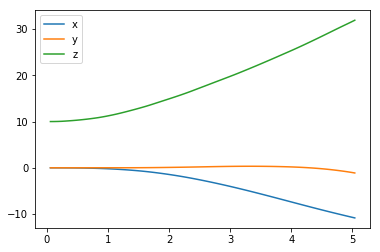

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

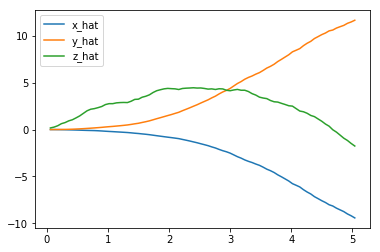

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

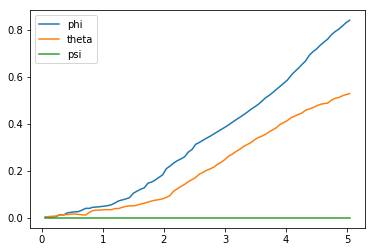

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

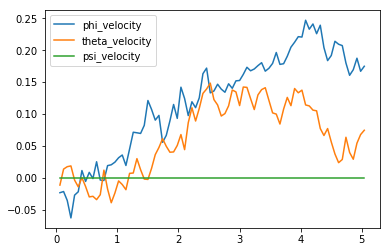

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

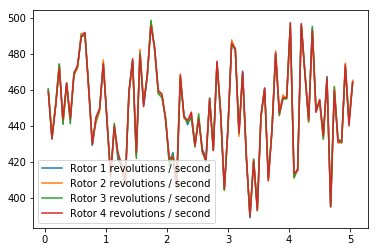

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-13.91669904  20.36267298  23.25699018   0.84071069   0.52889349
   0.        ]
[-9.41618407 11.64987134 -1.75405959]
[0.17482489 0.07444695 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).

<font color='red'>HS:This is just like stacking 4 frames together to show a sequence. <br> From paper: in order to make the problems approximately fully observable in the high dimensional environment we used action repeats. For each timestep of the agent, we step the simulation 3 timesteps, repeating the agent’s action and rendering each time. Thus the observation reported to the agent contains 9 feature maps (the RGB of each of the 3 renderings) which allows the agent to infer velocities using the differences between frames. </font>

- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`. <font color='red'> The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation. </font>

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [4]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) #hs this just returns the best action (=rotor speeds) 
        next_state, reward, done = task.step(action) #reward is distance from target
        agent.step(reward, done)
        state = next_state
        if done: #time has expired, or pos is out of sim bounds
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.451 (best =  -0.056), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

<font color='green'>self.state_size = self.action_repeat * 6 <br> We set the number of elements in the state vector to 6. For the sample task, we only work with the 6-dimensional pose information. To set the size of the state (state_size), we must take action repeats into account. <br><br>
The environment will always have a 4-dimensional action space, with one entry for each rotor (action_size=4). You can set the minimum (action_low) and maximum (action_high) values of each entry here.</font>

In [1]:
import random

%load_ext autoreload
%autoreload 2
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/home/ubuntu/anaconda3/envs/tv-scripts-project/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def hsPlotRewards(rewards_list):
    eps = np.array(rewards_list)
    plt.plot(eps[:,1])
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

In [3]:
#HS experience replay buffer
from collections import deque

class Memory():
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
            
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

####hs Load the experience buffer using the random actions taken by Policy agent:

In [4]:
from physics_sim import PhysicsSim

class hsTask():
    """Task (environment) that defines the goal and provides feedback to the agent."""
    def __init__(self, init_pose=None, init_velocities=None, 
        init_angle_velocities=None, runtime=5., target_pos=None):
        """Initialize a Task object.
        Params
        ======
            init_pose: initial position of the quadcopter in (x,y,z) dimensions and the Euler angles
            init_velocities: initial velocity of the quadcopter in (x,y,z) dimensions
            init_angle_velocities: initial radians/second for each of the three Euler angles
            runtime: time limit for each episode
            target_pos: target/goal (x,y,z) position for the agent
        """
        # Simulation
        self.sim = PhysicsSim(init_pose, init_velocities, init_angle_velocities, runtime) 
        self.action_repeat = 1 # hs before it was 3

        self.state_size = self.action_repeat * 6
        self.action_low = 0
        self.action_high = 900
        self.action_size = 4

        # Goal
        self.target_pos = target_pos if target_pos is not None else np.array([0., 0., 10.]) 

    def get_reward(self):
        """Uses current pose of sim to return reward."""
        reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum()
        return reward

    def step(self, rotor_speeds):
        #print("hs rotor speeds:\n", rotor_speeds)
        done = self.sim.next_timestep(rotor_speeds) # update the sim pose and velocities
        reward = self.get_reward() 
        next_state = self.sim.pose
        return next_state, reward, done

    def reset(self):
        """Reset the sim to start a new episode."""
        self.sim.reset()
        state = np.concatenate([self.sim.pose] * self.action_repeat) 
        return state

In [5]:
######################################
########### VER 2 ####################
######################################

class QNetwork_V2:
    def __init__(self, learning_rate, state_size, action_size, hidden_size, name='QNetwork'):
        # state inputs to the Q-network
        with tf.variable_scope(name):
            self.inputs_ = tf.placeholder(tf.float32, [None, state_size], name='inputs')
            
            self.actions_ = tf.placeholder(tf.int32, [None, action_size], name='actions')
            
            # Target Q values for training
            self.targetQs_ = tf.placeholder(tf.float32, [None, action_size], name='target')
            
            # ReLU hidden layers
            self.fc1 = tf.contrib.layers.fully_connected(self.inputs_, hidden_size)
            self.fc2 = tf.contrib.layers.fully_connected(self.fc1, hidden_size)
            self.fc3 = tf.contrib.layers.fully_connected(self.fc2, hidden_size)
            self.fc4 = tf.contrib.layers.fully_connected(self.fc3, hidden_size)

            # Linear output layer
            self.output = tf.contrib.layers.fully_connected(self.fc4, action_size, 
                                                            activation_fn=None)
            
            ### Train with loss (targetQ - Q)^2
            self.loss = tf.reduce_mean(tf.square(self.targetQs_ - self.output))
            self.opt = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

In [6]:
######################################
########### VER 1 ####################
######################################

class QNetwork_V1:
    def __init__(self, learning_rate, state_size, action_size, hidden_size, name='QNetwork'):
        # state inputs to the Q-network
        with tf.variable_scope(name):
            self.inputs_ = tf.placeholder(tf.float32, [None, state_size], name='inputs')
            
            self.actions_ = tf.placeholder(tf.int32, [None, action_size], name='actions')
            
            # Target Q values for training
            self.targetQs_ = tf.placeholder(tf.float32, [None, action_size], name='target')
            
            # ReLU hidden layers
            self.fc1 = tf.contrib.layers.fully_connected(self.inputs_, hidden_size)
            self.fc2 = tf.contrib.layers.fully_connected(self.fc1, hidden_size)

            # Linear output layer
            self.output = tf.contrib.layers.fully_connected(self.fc2, action_size, 
                                                            activation_fn=None)
            
            ### Train with loss (targetQ - Q)^2
            # output has length 2, for two actions. This next line chooses
            # one value from output (per row) according to the one-hot encoded actions.
            '''
            self.Q = tf.reduce_sum(tf.multiply(self.output, one_hot_actions), axis=1)
            
            self.loss = tf.reduce_mean(tf.square(self.targetQs_ - self.Q))
            '''
            self.loss = tf.reduce_mean(tf.square(self.targetQs_ - self.output))
            self.opt = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

In [7]:
# HS hyper params
action_size = 4
state_size = 6
hidden_size = 256  #1: 64        # number of units in each Q-network hidden layer
learning_rate =0.0001 #3:0.000001, 2:0.00001,  1: 0.0001  

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 20 #3: 1000, 2: 50, 1: 20              # experience mini-batch size
pretrain_length = batch_size   # number experiences to pretrain the memory

train_episodes = 1000  

train_episodes = 1000 #16 #1000          # max number of episodes to learn from
gamma = 0.99                   # future reward discount

# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.00001   #4: ,3:0.00001 2:0.001, 1: 0.01            # minimum exploration probability 
decay_rate = 0.01   #3:0.01 , 2:0.001, 1: 0.0001            # exponential decay rate for exploration prob

In [8]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
#from hsTask import Task

target_pos = np.array([0., 0., 10.])
task = hsTask(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

#setup buffer:
memory = Memory(max_size=memory_size)

for i_episode in range(1, pretrain_length+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) #hs this just returns the best action (=rotor speeds) 
        next_state, reward, done = task.step(action) #reward is distance from target
        agent.step(reward, done)
        
        #print("actionTobeAdded To memory:\n", action)
        memory.add((state, action, reward, next_state))
        
        state = next_state
        if done: #time has expired, or pos is out of sim bounds
            print("\rTimeStep = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

print("\nmemory buffer length: ", len(memory.buffer))

TimeStep =   20, score =  -0.548 (best =  -0.002), noise_scale = 3.25
memory buffer length:  1486


In [9]:
tf.reset_default_graph()
mainQN = QNetwork_V1(learning_rate, state_size, action_size, hidden_size, 'main')

In [ ]:
######################################
########### VER 3 ####################
######################################

## TODO: Train your agent here.
import sys
import pandas as pd
#from hsTask import Task

target_pos = np.array([0., 0., 10.])
#task = Task(target_pos=target_pos)
task = hsTask(target_pos=target_pos)
agent = PolicySearch_Agent(task) 


# Now train with experiences
saver = tf.train.Saver()
rewards_list = []

with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    step = 0
    for ep in range(1, train_episodes):
        state = agent.reset_episode() # start a new episode
        total_reward = 0

        while True:
            step += 1
            
            # Explore or Exploit
            explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*step) 
            if explore_p > np.random.rand():
                # Make a random action
                action = agent.act(state)
            else:
                # Get action from Q-network
                feed = {mainQN.inputs_: state.reshape((1, *state.shape))}
                action = sess.run(mainQN.output, feed_dict=feed)
            
            # Take action, get new state and reward
            #print("actionShape:\n", action.shape)
            next_state, reward, done = task.step(action.reshape((action_size,)))
            #print("done:\n", done)
    
            total_reward += reward
            
            if done:
                # the episode ends so no next state
                next_state = np.zeros(state.shape)
                rewards_list.append((ep, total_reward))
                
                print('Episode: {}'.format(ep),
                      'Total reward: {}'.format(total_reward),
                      'Training loss: {:.4f}'.format(loss),
                      'Explore P: {:.4f}'.format(explore_p))
                
                break

            # Add experience to memory
            #print("actionTobeAdded To memory:\n", action)
            memory.add((state, action, reward, next_state))
            state = next_state
                
            
            # Sample mini-batch from memory
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            rewards = np.array([each[2] for each in batch])
            next_states = np.array([each[3] for each in batch])
            
            # Train network:
            
            target_Qs = sess.run(mainQN.output, feed_dict={mainQN.inputs_: next_states})
            
            
            # Set target_Qs to 0 for states where episode ends
            episode_ends = (next_states == np.zeros(states[0].shape)).all(axis=1)
            target_Qs[episode_ends] = 0
            
            #targets = rewards + gamma * target_Qs
            temp = tf.multiply(gamma, target_Qs)
            targets = tf.add(tf.constant(rewards, dtype=tf.float32, shape=temp.shape), temp)
            
            #print("actionsShape:\n", actions.shape)
            if actions.shape != (batch_size, action_size):
                actions = np.zeros((batch_size, action_size), dtype=float)

            loss, _ = sess.run([mainQN.loss, mainQN.opt],
                                feed_dict={mainQN.inputs_: states,
                                           mainQN.targetQs_: targets.eval(),
                                           mainQN.actions_: actions})
                
        sys.stdout.flush()
        
    saver.save(sess, "checkpoints/hsQuad.ckpt")

Episode: 1 Total reward: -191.0525461492266 Training loss: 1.1068 Explore P: 0.3946
Episode: 2 Total reward: -21.621148975445617 Training loss: 11.5412 Explore P: 0.1721
Episode: 3 Total reward: 5.132257418368781 Training loss: 1.3742 Explore P: 0.0797
Episode: 4 Total reward: -15.24800846032912 Training loss: 1.9960 Explore P: 0.0365
Episode: 5 Total reward: -0.544194328879108 Training loss: 0.8481 Explore P: 0.0185
Episode: 6 Total reward: 2.7442454648906165 Training loss: 2.2970 Explore P: 0.0096
Episode: 7 Total reward: -0.8962815856566335 Training loss: 1.2462 Explore P: 0.0045
Episode: 8 Total reward: 2.769857007228774 Training loss: 0.7944 Explore P: 0.0023
Episode: 9 Total reward: 2.762826729373058 Training loss: 1.2250 Explore P: 0.0012
Episode: 10 Total reward: -2.636949977551217 Training loss: 11.8361 Explore P: 0.0006
Episode: 11 Total reward: 2.807064528966945 Training loss: 1.3867 Explore P: 0.0003
Episode: 12 Total reward: 2.801738305811504 Training loss: 2.1278 Explore 

In [ ]:
# best (4) with lower batch size
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 20, 
explore_stop = 0.00001      
decay_rate = 0.01
'''
hsPlotRewards(rewards_list) 

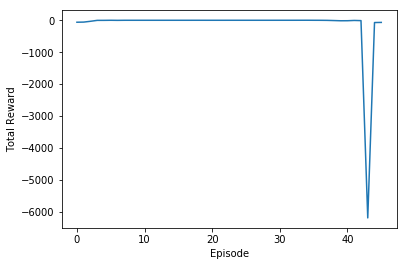

In [11]:
# best (4) with lower exploration stop
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 1000, 
explore_stop = 0.000000001     
decay_rate = 0.01
'''
hsPlotRewards(rewards_list) 

### Tuning hyper params

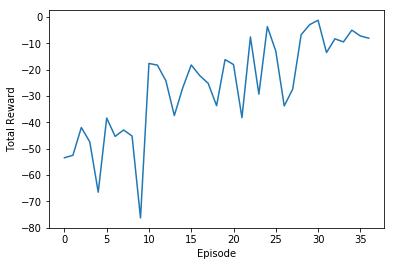

In [11]:
# Same as below, with batch size of 100 to make it faster
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 100, 
explore_stop = 0.00001      
decay_rate = 0.001
'''
hsPlotRewards(rewards_list)  

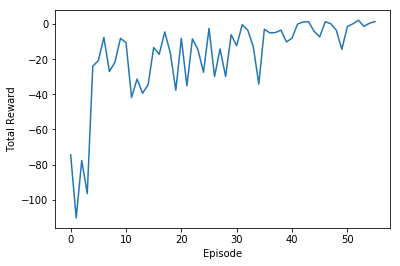

In [11]:
# best (4) with reduced decay rate of exploration for longer runs Try 2. This is good but too slow.
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 1000, 
explore_stop = 0.00001      
decay_rate = 0.001
'''
hsPlotRewards(rewards_list)  

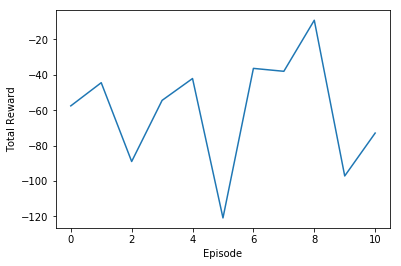

In [11]:
# best (3) with reduced decay rate and half the batch size.
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 500, 
explore_stop = 0.00001      
decay_rate = 0.001
'''
hsPlotRewards(rewards_list)  

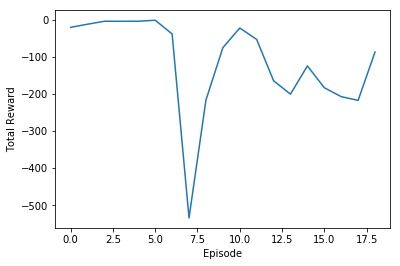

In [11]:
# best (3) with higher learning rate dramatically worsened the performance
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.001, 
hidden_size = 256, 
batch size = 1000, 
explore_stop = 0.00001      
decay_rate = 0.01
'''
hsPlotRewards(rewards_list) 

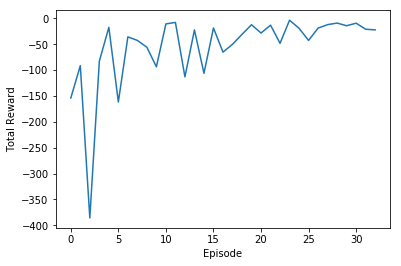

In [12]:
# best (3) with reduced decay rate of exploration for longer runs Try 1
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 1000, 
explore_stop = 0.00001      
decay_rate = 0.001
'''
hsPlotRewards(rewards_list)  

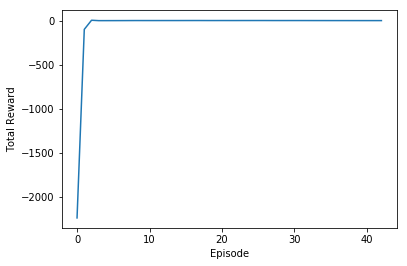

In [11]:
# best (4) wit reduced exploration (increase decay)
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 1000, 
explore_stop = 0.00001      
decay_rate = 0.01
'''
hsPlotRewards(rewards_list) 

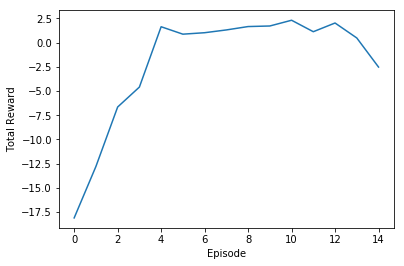

In [16]:
# best so far (3) increasing batch size makes (best 2)  much better
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 1000, 
explore_stop = 0.00001      
decay_rate = 0.01#1: 0.0001
'''
hsPlotRewards(rewards_list)  

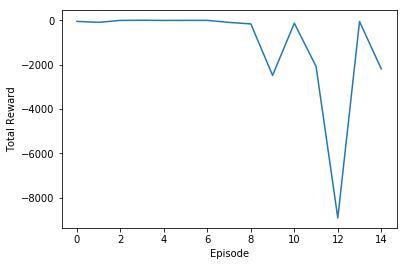

In [13]:
# Same as below but with v2
'''
Version 3, 
QNetwork_V2, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 100, 
explore_stop = 0.00001      
decay_rate = 0.01#1: 0.0001
'''
hsPlotRewards(rewards_list)  

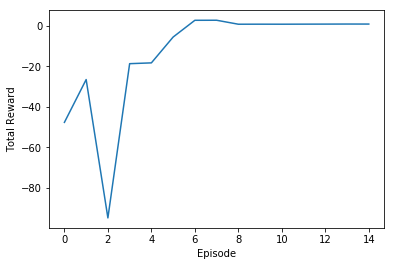

In [11]:
# best so far (2)

# decreasing exploration made it much better Try 2
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 100, 
explore_stop = 0.00001      
decay_rate = 0.01#1: 0.0001
'''
hsPlotRewards(rewards_list)  

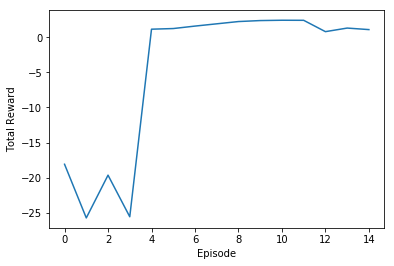

In [22]:
# same as above Try 1 

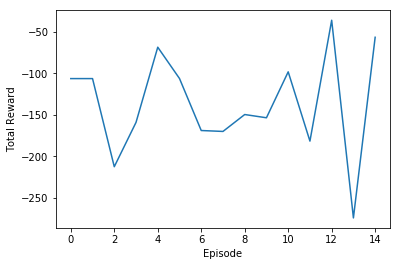

In [12]:
# increasing exploration made best so far bad.
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 100, 
explore_stop = 0.01          
decay_rate =  0.0001
'''
hsPlotRewards(rewards_list)  

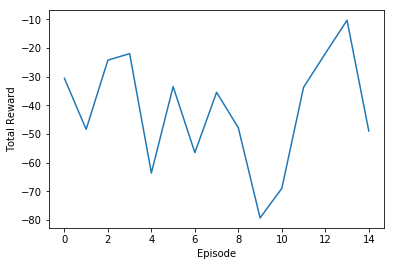

In [17]:
#best so far (1) Try 2
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 100, 
explore_stop = 0.001#1: 0.01          
decay_rate = 0.001#1: 0.0001
'''
hsPlotRewards(rewards_list)  

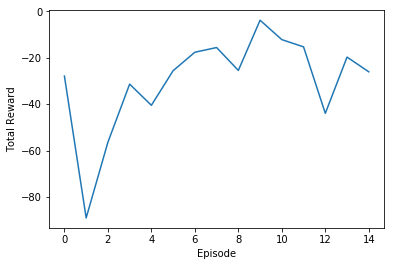

In [11]:
# same as above try 1

In [ ]:
'''
Version 3, 
QNetwork_V1, 
defaults except learning_rate =0.000001, 
hidden_size = 256, 
batch size = 4, 
explore_stop = 0.001#1: 0.01          
decay_rate = 0.001#1: 0.0001
'''
hsPlotRewards(rewards_list)  

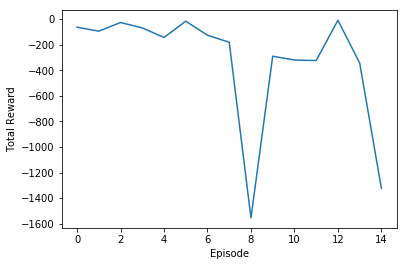

In [21]:
'''
Version 3, 
QNetwork_V2, 
defaults except learning_rate =0.0001, 
hidden_size = 256, 
batch size = 100, 
explore_stop = 0.001#1: 0.01          
decay_rate = 0.001#1: 0.0001
'''
hsPlotRewards(rewards_list)  

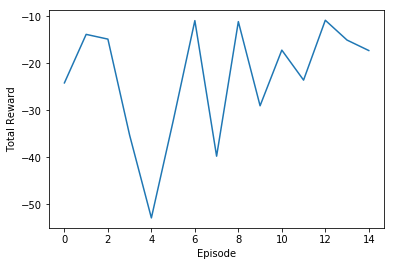

In [16]:
'''
Version 3, 
QNetwork_V2, 
defaults except learning_rate =0.000001, 
hidden_size = 256, 
batch size = 4, 
explore_stop = 0.001#1: 0.01          
decay_rate = 0.001#1: 0.0001
'''
hsPlotRewards(rewards_list)  

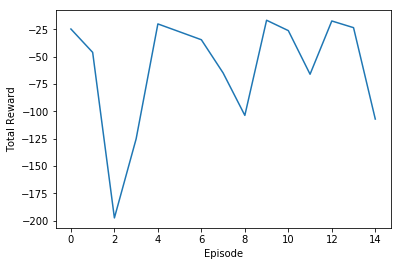

In [11]:
'''
Version 3, 
QNetwork_V2, 
defaults except learning_rate =0.000001, 
hidden_size = 256, 
batch size = 50, 
explore_stop = 0.001#1: 0.01          
decay_rate = 0.001#1: 0.0001
'''
hsPlotRewards(rewards_list)  

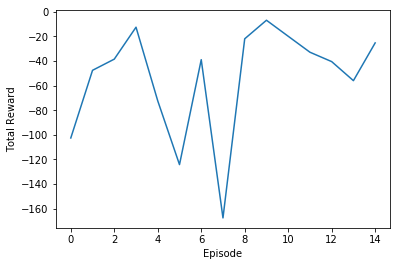

In [21]:
'''
Version 3,QNetwork_V1, defaults except learning_rate =0.000001, hidden_size = 256, batch size = 50, explore_stop = 0.001#1: 0.01            # minimum exploration probability 
decay_rate = 0.001#1: 0.0001
'''
hsPlotRewards(rewards_list)  

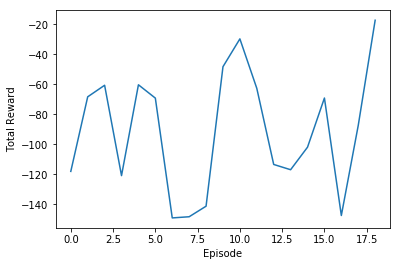

In [15]:
hsPlotRewards(rewards_list)  #Version 3,QNetwork_V1, defaults except learning_rate =0.000001, hidden_size = 256, batch size = 50

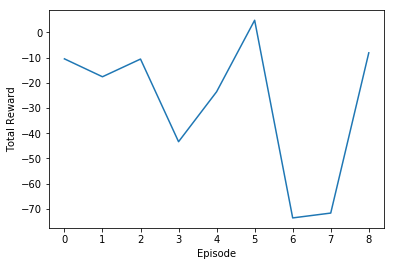

In [10]:
hsPlotRewards(rewards_list)  #Version 3,QNetwork_V1, defaults except learning_rate =0.00001, hidden_size = 256 

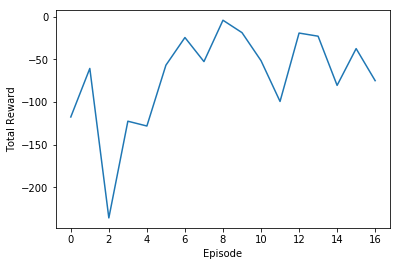

In [10]:
hsPlotRewards(rewards_list)  #Version 3,QNetwork_V2, defaults except learning_rate =0.00001

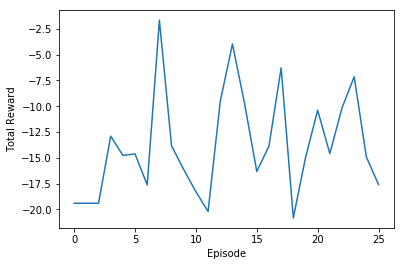

In [11]:
hsPlotRewards(rewards_list)  #Version 3, defaults except learning_rate =0.00001

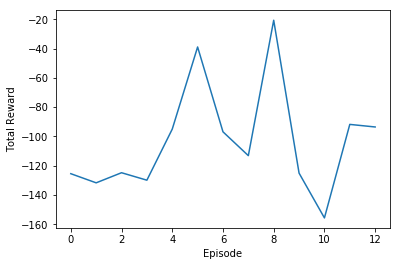

In [52]:
hsPlotRewards(rewards_list)  #Version 3, defaults 

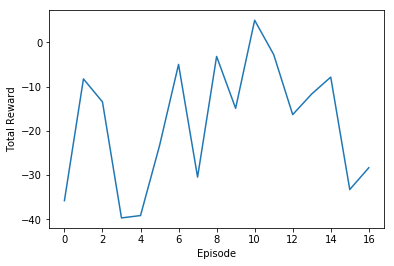

In [48]:
#Version 2, defaults 

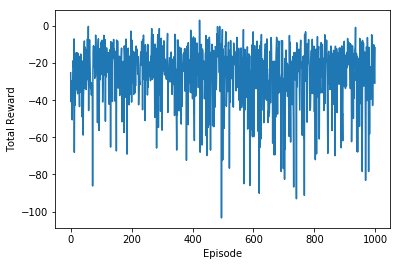

In [55]:
## Base line performance, taking random actions
eps = np.array(rewards_list).T
plt.plot(eps)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

In [ ]:
######################################
########### VER 2 ####################
######################################

## TODO: Train your agent here.
import sys
import pandas as pd
#from hsTask import Task

target_pos = np.array([0., 0., 10.])
#task = Task(target_pos=target_pos)
task = hsTask(target_pos=target_pos)
agent = PolicySearch_Agent(task) 


# Now train with experiences
saver = tf.train.Saver()
rewards_list = []

with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    step = 0
    for ep in range(1, train_episodes):
        state = agent.reset_episode() # start a new episode
        total_reward = 0

        while True:
            step += 1
            
            # Explore or Exploit
            explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*step) 
            if explore_p > np.random.rand():
                # Make a random action
                action = agent.act(state)
            else:
                # Get action from Q-network
                feed = {mainQN.inputs_: state.reshape((1, *state.shape))}
                action = sess.run(mainQN.output, feed_dict=feed)
            
            # Take action, get new state and reward
            #print("actionShape:\n", action.shape)
            next_state, reward, done = task.step(action.reshape((action_size,)))
            #print("done:\n", done)
    
            total_reward += reward
            
            if done:
                # the episode ends so no next state
                next_state = np.zeros(state.shape)
                rewards_list.append((ep, total_reward))
                
                print('Episode: {}'.format(ep),
                      'Total reward: {}'.format(total_reward),
                      'Training loss: {:.4f}'.format(loss),
                      'Explore P: {:.4f}'.format(explore_p))
                
                break

            # Add experience to memory
            #print("actionTobeAdded To memory:\n", action)
            memory.add((state, action, reward, next_state))
            state = next_state
                
            
            # Sample mini-batch from memory
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            rewards = np.array([each[2] for each in batch])
            next_states = np.array([each[3] for each in batch])
            
            # Train network:
            
            target_Qs = sess.run(mainQN.output, feed_dict={mainQN.inputs_: next_states})
            
            
            # Set target_Qs to 0 for states where episode ends
            episode_ends = (next_states == np.zeros(states[0].shape)).all(axis=1)
            target_Qs[episode_ends] = 0
            
            #targets = rewards + gamma * target_Qs
            temp = tf.multiply(gamma, target_Qs)
            targets = tf.add(tf.constant(rewards, dtype=tf.float32, shape=temp.shape), temp)
            
            #print("actionsShape:\n", actions.shape)
            if actions.shape == (batch_size, action_size):
                loss, _ = sess.run([mainQN.loss, mainQN.opt],
                                    feed_dict={mainQN.inputs_: states,
                                               mainQN.targetQs_: targets.eval(),
                                               mainQN.actions_: actions})
                
        sys.stdout.flush()
        
    saver.save(sess, "checkpoints/hsQuad.ckpt")

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
The task I am using for this project is "reaching a target position". For the reward function I am using the negetive of the distance between the current position and target as the reward (1-distance_between_position_and_target).

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:<br>
I used Deep Q-Learning with fixed Q targets and Experience Replay. Increasing the batch size (i.e. size of the experience replay buffer), improved the performance of the algorithm. In addition, intializing the experience buffer using the provide policy_agent, which takes random actions at every step, proved to be a better method than initializing it using my own Q-Learning agent (i.e. using the neural network with random weights without taking any learning steps). 
<br><br>
<strong>In tuning hyper parameters:</strong><br><br>
    learning rate: I tried values of 0.000001, 0.00001,0.0001, and 0.001. Found the best learning rate to be 0.0001. 
    <br><br>
    batch size: I tried values from 20 t0 1024, consistantly the larger batch sizes performed better (as expected) 
    at the cost of being slower. I am using a batch size of 1024.
    <br><br>
    minimum exploration probability: I found that the lower the value the better the performance. I tried 0.01, 0.001, but 
    ended up using 0.00001. 
    <br><br>
    exploration decay_rate: A value of 0.0001 turned out to be to slow (too much exploration), with 0.01 the exploration ends to 
    early so after about 50 episodes we no longer make progress. I ended up using 0.001 to make a compromise between the two.
    <br><br>
    
<strong>For network architecture:</strong><br><br>
    I decided on a MLP (fully connected layers). I tried 2, 3, and 4 hidden layers. Turned out adding hidden layers does not 
    increase the performance by much given how much it slowed down training. 
    <br><br>
    For the number of neurons in each hiddel layer, I tried 64,128,256. I observed that increasing the number of neurons 
    improves the performance. I decided on 256 neurons in each of my hidden layers.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:<br>
The task is definately not easy to learn, but with tuned hyper parameters it can be learned fairly quickly.
<br>
It was definately a gradual learning curve. I had to try several models and many hyper parameter values to get it working. 
<br>
The mean rewards over the las 10 episodes was 3.1

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
The hardest part of this project was deciding on the first RL algorithm to try. After that the major problem was tuning in the huper parameters, including network architecutres, batch sizes, and the size of experience buffer. In terms of implementation, getting tensor flow to use the Q-values at the next step as the target for learning on the current step was challanging. 
<br><br>
It was interesting how the QuadCopter learned that reaching the target destination as fast as possible can result in higher rewards.
